In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('student_scores.csv')

In [3]:
dataset.shape

(25, 2)

In [41]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


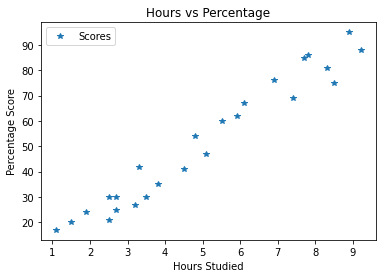

In [6]:
dataset.plot(x='Hours', y='Scores', style='*')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [44]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
print(regressor.intercept_)

2.018160041434683


In [11]:
print(regressor.coef_)

[9.91065648]


In [12]:
y_pred = regressor.predict(X_test)

In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R squared: 0.9454906892105356


In [15]:
# Regression Tree
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X_train, y_train)
dec_tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [18]:
y_pred_tree = dec_tree_reg.predict(X_test)

In [20]:
print('Decision Tree Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_tree))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_tree))
print('R squared:', metrics.r2_score(y_test, y_pred_tree))

Decision Tree Error: 10.917875251164945
Mean Absolute Error: 9.6
Mean Squared Error: 119.2
R squared: 0.6991722188572582


In [21]:
from sklearn.ensemble import RandomForestRegressor
rand_forest_reg = RandomForestRegressor(random_state=0)
rand_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [22]:
y_pred_rand_forest = rand_forest_reg.predict(X_test)

In [23]:
print('Random Forest Regressor Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rand_forest)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rand_forest))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rand_forest))
print('R squared:', metrics.r2_score(y_test, y_pred_rand_forest))

Random Forest Regressor Error: 8.829165125058857
Mean Absolute Error: 6.862833333333333
Mean Squared Error: 77.95415680555557
R squared: 0.8032653018232496


In [45]:
print(X_train[0])
print(regressor.predict(X_train[[0]]))

[3.8]
[39.67865467]


In [30]:
import pickle

In [32]:
data = {"model":regressor, "hours":X_train}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [33]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
hours = data["hours"]

In [39]:
y_pred = regressor_loaded.predict(X_train[[0]])
print(f"Number of Hours: {X_train[0]} , Marks: {y_pred}")

Number of Hours: [3.8] , Marks: [39.67865467]


In [38]:
y_pred = regressor_loaded.predict(X_test[[0]])
print(f"Number of Hours: {X_test[0]} , Marks: {y_pred}")

Number of Hours: [1.5] , Marks: [16.88414476]
